In [1]:
# Install
# install.packages("tm")  # for text mining
# install.packages("SnowballC") # for text stemming
# install.packages("wordcloud") # word-cloud generator 
# install.packages("RColorBrewer") # color palettes
# Load
library("tm")
library("SnowballC")
library("wordcloud")
library("RColorBrewer")

Warning message:
"package 'tm' was built under R version 3.6.3"
Loading required package: NLP

Warning message:
"package 'wordcloud' was built under R version 3.6.3"
Loading required package: RColorBrewer



In [2]:
# Step 3
# filePath <- './Data/kennedy_moon_speech.txt'
# filePath
# text <- readLines('./Data/kennedy_moon_speech.txt')

filePath <- "https://raw.githubusercontent.com/CMorar143/datavis/master/Labs/Lab8/Data/kennedy_moon_speech.txt"
text <- readLines(filePath)

Warning message in readLines(filePath):
"incomplete final line found on 'https://raw.githubusercontent.com/CMorar143/datavis/master/Labs/Lab8/Data/kennedy_moon_speech.txt'"


In [3]:
docs <- Corpus(VectorSource(text))
#VectorSource() function creates a corpus of character vectors

In [4]:
# Step 4
inspect(docs)

<<SimpleCorpus>>
Metadata:  corpus specific: 1, document level (indexed): 0
Content:  documents: 61

 [1] I am delighted to be here, and I'm particularly delighted to be here on this occasion.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

In [5]:
# Step 5
# toSpace <- content_transformer(function (x , pattern ) gsub(pattern, " ", x))
# docs <- tm_map(docs, toSpace, "/")
# docs <- tm_map(docs, toSpace, "@")
# docs <- tm_map(docs, toSpace, "\\|")
                               
# Convert the text to lower case
docs <- tm_map(docs, content_transformer(tolower))
                               
# Remove numbers
docs <- tm_map(docs, removeNumbers)
                               
# Remove english common stopwords
docs <- tm_map(docs, removeWords, stopwords("english"))
                               
# Remove punctuations
docs <- tm_map(docs, removePunctuation)
                               
# Eliminate extra white spaces
docs <- tm_map(docs, stripWhitespace)
                               
# Step 6
inspect(docs)

Warning message in tm_map.SimpleCorpus(docs, content_transformer(tolower)):
"transformation drops documents"
Warning message in tm_map.SimpleCorpus(docs, removeNumbers):
"transformation drops documents"
Warning message in tm_map.SimpleCorpus(docs, removeWords, stopwords("english")):
"transformation drops documents"
Warning message in tm_map.SimpleCorpus(docs, removePunctuation):
"transformation drops documents"
Warning message in tm_map.SimpleCorpus(docs, stripWhitespace):
"transformation drops documents"


<<SimpleCorpus>>
Metadata:  corpus specific: 1, document level (indexed): 0
Content:  documents: 61

 [1]  delighted particularly delighted occasion                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
 [2]                                                                                                                                                                                                                                         

,word,freq
,<fct>,<dbl>
new,new,22
will,will,22
space,space,22
years,years,10
man,man,10
knowledge,knowledge,9
first,first,7
moon,moon,7
city,city,6


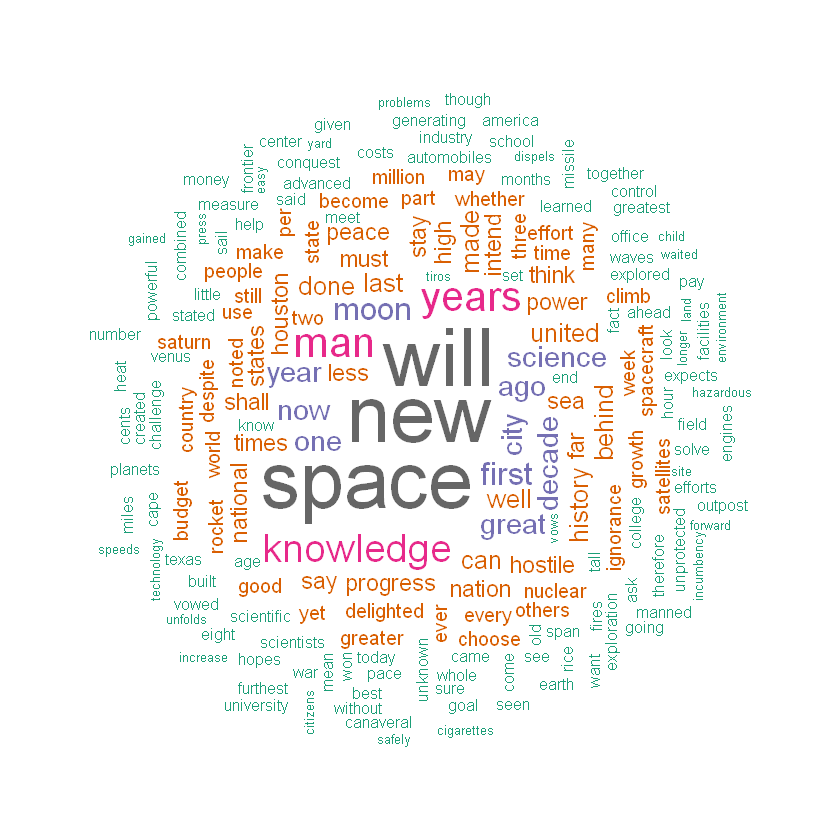

In [6]:
# Step 7
dtm <- TermDocumentMatrix(docs)
m <- as.matrix(dtm)
v <- sort(rowSums(m),decreasing=TRUE)
d <- data.frame(word = names(v),freq=v)
head(d, 10)

set.seed(1234)# This makes the cloud reproducable.

wordcloud(words = d$word, freq = d$freq, min.freq = 1,
          max.words=200, random.order=FALSE, rot.per=0.35, 
          colors=brewer.pal(8, "Dark2"))

[1] "city"      "decade"    "knowledge" "progress"  "far"       "times"    
 [7] "years"     "ago"       "can"       "first"     "history"   "less"     
[13] "man"       "new"       "power"     "will"      "year"      "last"     
[19] "now"       "high"      "space"     "well"      "behind"    "houston"  
[25] "states"    "stay"      "united"    "great"     "must"      "nation"   
[31] "one"       "hostile"   "intend"    "made"      "moon"      "peace"    
[37] "shall"     "science"   "say"       "sea"       "national"  "done"     
[43] "think"

$freedom
     backwash        banner        beyond       certain        coming 
         1.00          1.00          1.00          1.00          1.00 
  destruction          eyes        filled          flag       founder 
         1.00          1.00          1.00          1.00          1.00 
   generation      governed    industrial   instruments     invention 
         1.00          1.00          1.00          1.00          1.00 
         lead          mass          mean        modern   revolutions 
         1.00          1.00          1.00          1.00          1.00 
         rode           see understanding         vowed          wave 
         1.00          1.00          1.00          1.00          1.00 
        waves       weapons         shall         first           age 
         1.00          1.00          0.81          0.77          0.70 
         came          look      conquest       planets         world 
         0.70          0.70          0.70          0.70          0.57 
      nuclear         power        intend         peace       country 
         0.57          0.49          0.49          0.49          0.44 
         part          made       hostile         space           now 
         0.44          0.43          0.39          0.36          0.33 
         moon 
         0.31

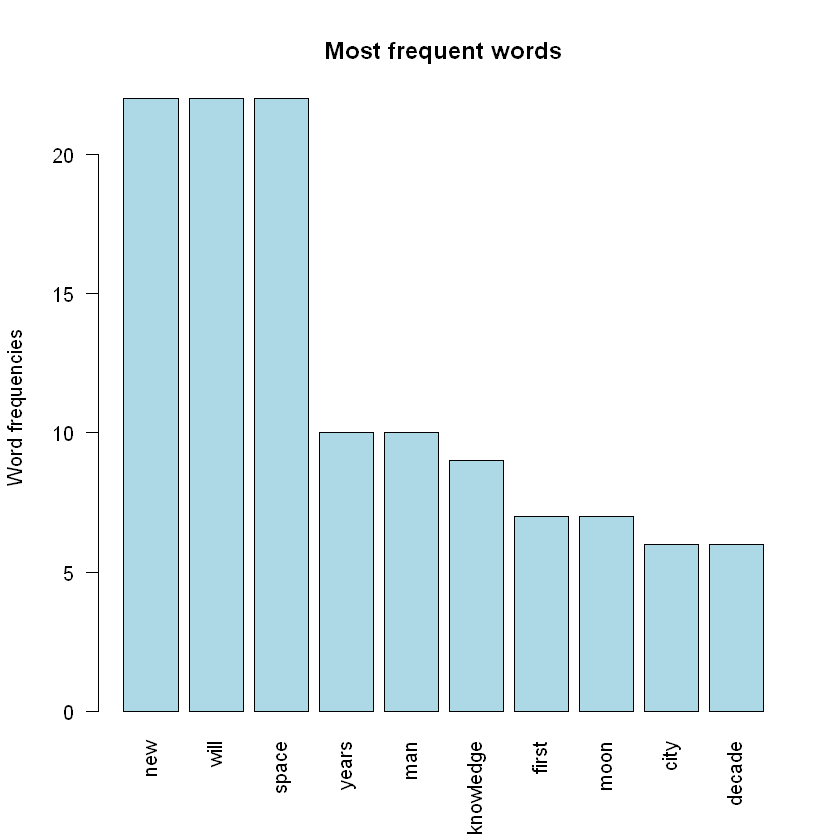

In [7]:
# Step 8
findFreqTerms(dtm, lowfreq = 4)
findAssocs(dtm, terms = "freedom", corlimit = 0.3)
barplot(d[1:10,]$freq, las = 2, names.arg = d[1:10,]$word,
        col ="lightblue", main ="Most frequent words",
        ylab = "Word frequencies")

Warning message in readLines(filePath):
"incomplete final line found on 'https://raw.githubusercontent.com/CMorar143/datavis/master/Labs/Lab8/Data/kennedy_moon_speech.txt'"
Warning message in tm_map.SimpleCorpus(docs, content_transformer(tolower)):
"transformation drops documents"
Warning message in tm_map.SimpleCorpus(docs, removeNumbers):
"transformation drops documents"
Warning message in tm_map.SimpleCorpus(docs, removeWords, stopwords("english")):
"transformation drops documents"
Warning message in tm_map.SimpleCorpus(docs, removePunctuation):
"transformation drops documents"
Warning message in tm_map.SimpleCorpus(docs, stripWhitespace):
"transformation drops documents"


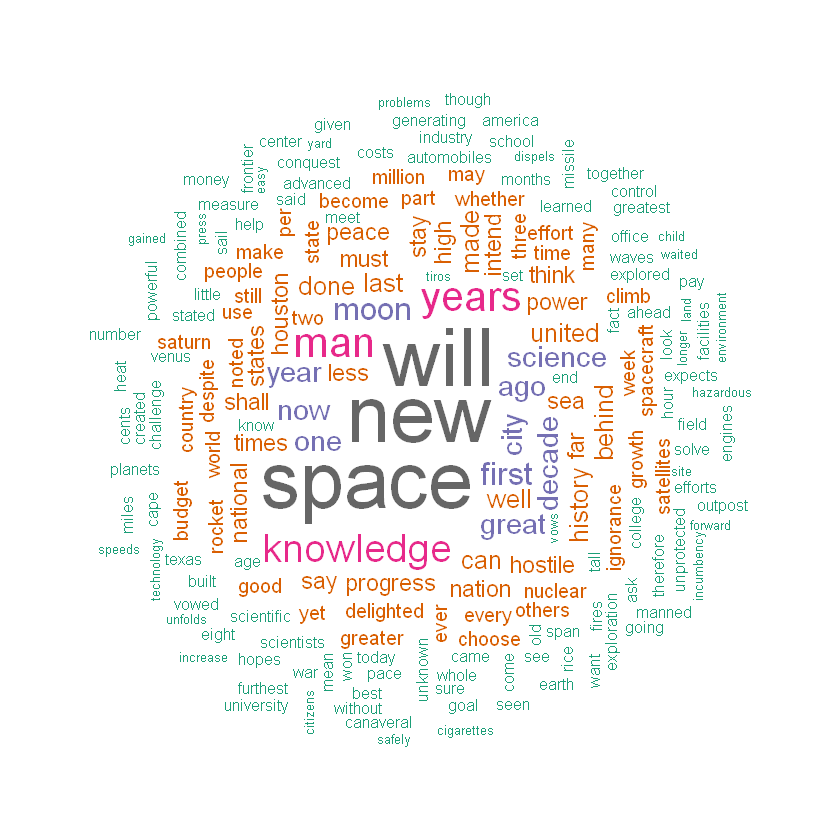

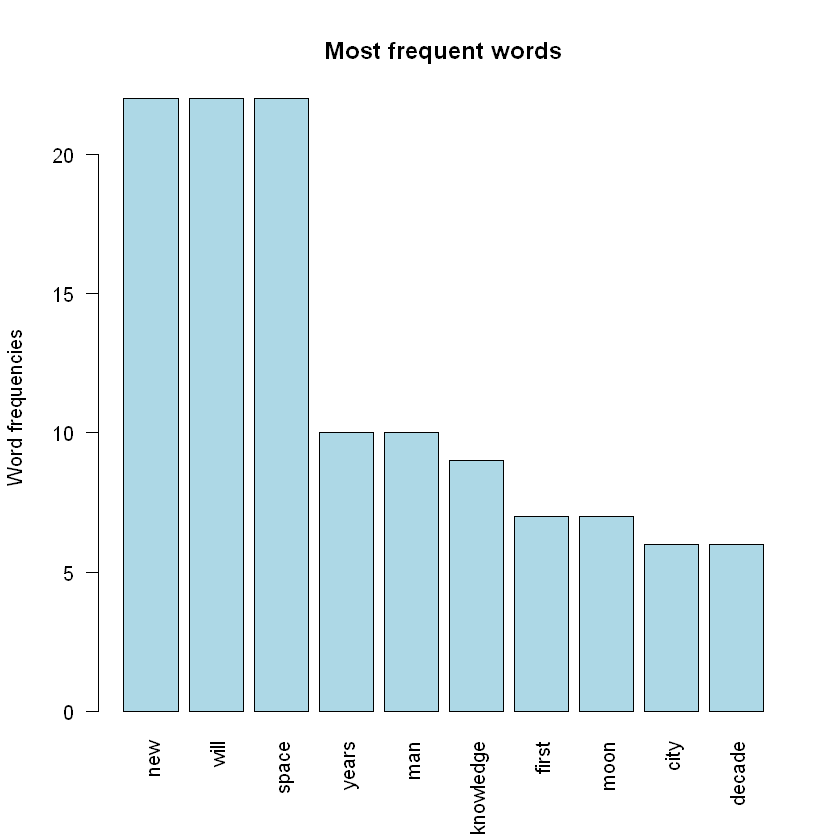

In [11]:
# Task 2
# Step 1
produce_cloud <- function(file_name) {
    docs <- Corpus(VectorSource(file_name))
    # Convert the text to lower case
    docs <- tm_map(docs, content_transformer(tolower))

    # Remove numbers
    docs <- tm_map(docs, removeNumbers)

    # Remove english common stopwords
    docs <- tm_map(docs, removeWords, stopwords("english"))

    # Remove punctuations
    docs <- tm_map(docs, removePunctuation)

    # Eliminate extra white spaces
    docs <- tm_map(docs, stripWhitespace)
    
    dtm <- TermDocumentMatrix(docs)
    m <- as.matrix(dtm)
    v <- sort(rowSums(m),decreasing=TRUE)
    d <- data.frame(word = names(v),freq=v)
    head(d, 10)

    set.seed(1234)# This makes the cloud reproducable.

    wordcloud(words = d$word, freq = d$freq, min.freq = 1,
              max.words=200, random.order=FALSE, rot.per=0.35, 
              colors=brewer.pal(8, "Dark2"))
    findFreqTerms(dtm, lowfreq = 4)
    findAssocs(dtm, terms = "freedom", corlimit = 0.3)
    barplot(d[1:10,]$freq, las = 2, names.arg = d[1:10,]$word,
            col ="lightblue", main ="Most frequent words",
            ylab = "Word frequencies")
}

filePath <- "https://raw.githubusercontent.com/CMorar143/datavis/master/Labs/Lab8/Data/kennedy_moon_speech.txt"
file_name <- readLines(filePath)
produce_cloud(file_name)

Warning message in readLines(filepath2):
"incomplete final line found on 'https://raw.githubusercontent.com/CMorar143/datavis/master/Labs/Lab8/Data/junky.txt'"
Warning message in tm_map.SimpleCorpus(docs, content_transformer(tolower)):
"transformation drops documents"
Warning message in tm_map.SimpleCorpus(docs, removeNumbers):
"transformation drops documents"
Warning message in tm_map.SimpleCorpus(docs, removeWords, stopwords("english")):
"transformation drops documents"
Warning message in tm_map.SimpleCorpus(docs, removePunctuation):
"transformation drops documents"
Warning message in tm_map.SimpleCorpus(docs, stripWhitespace):
"transformation drops documents"


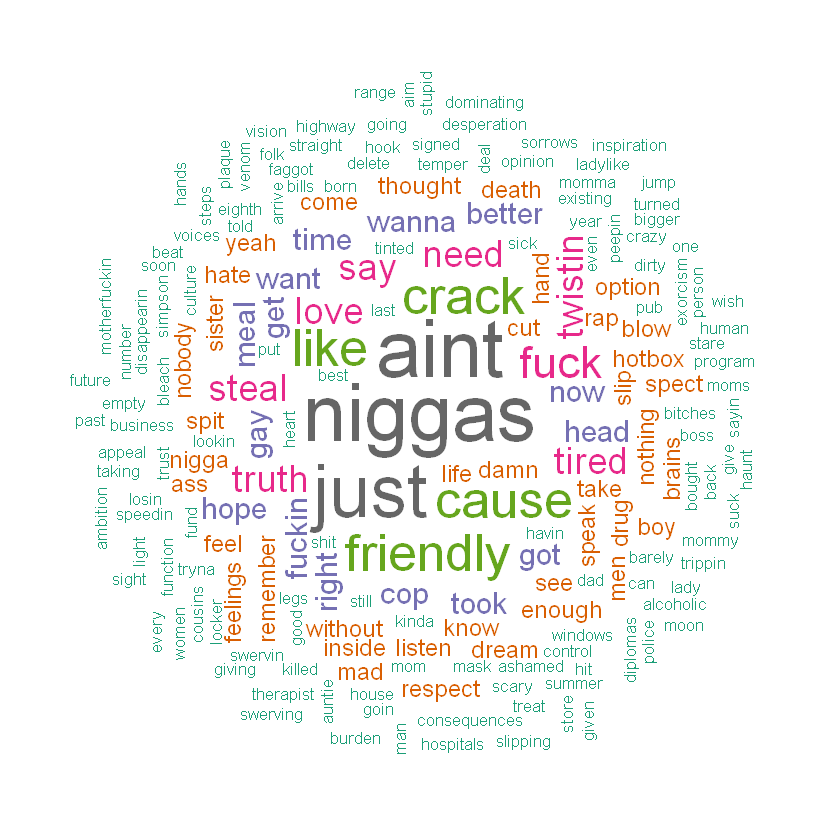

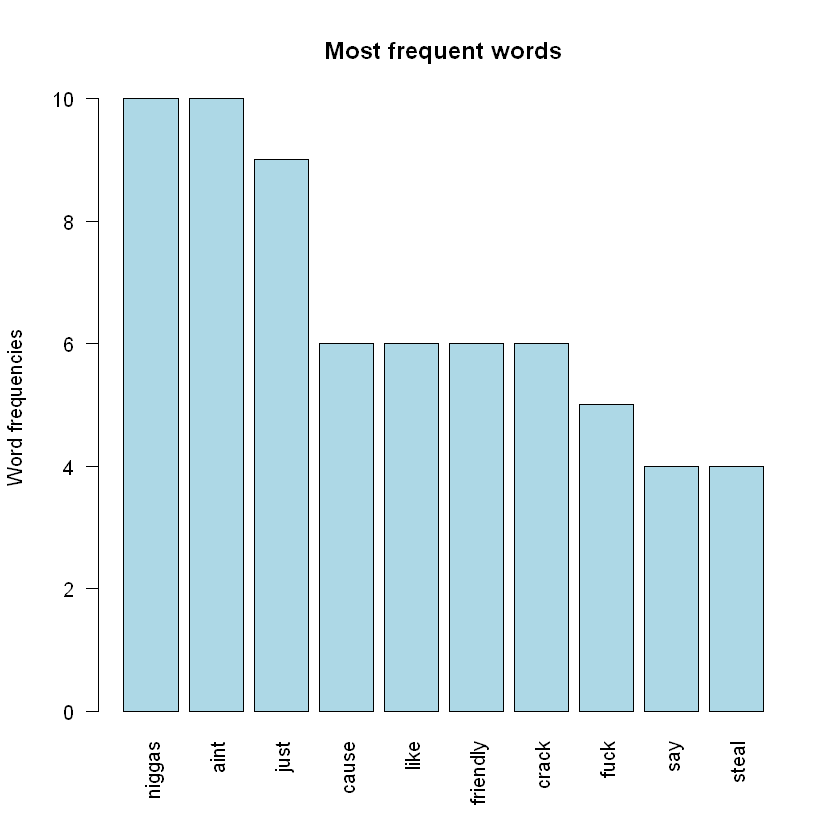

In [12]:
# Step 2
filepath2 <- "https://raw.githubusercontent.com/CMorar143/datavis/master/Labs/Lab8/Data/junky.txt"
# file_name <- 

produce_cloud(readLines(filepath2))